In [1]:
import pandas as pd
import json
import urllib.request
import urllib.parse
import urllib.error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://data.cambridgema.gov/resource/xuad-73uj.json?$limit=80000"
uh = urllib.request.urlopen(url)
data = uh.read().decode()
print('Retrieved', len(data), 'characters')

Retrieved 19257039 characters


In [3]:
#load data to a dictionary
myData = json.loads(data)

#load myData into a DataFrame object
df = pd.DataFrame(myData)

#print the first 5 rows of the DataFrame
print(df.head())

  file_number           date_of_report                      crime_date_time  \
0  2023-02647  2023-03-31T22:52:00.000  03/30/2023 16:00 - 03/31/2023 22:52   
1  2023-02643  2023-03-31T20:39:00.000                     03/31/2023 20:36   
2  2023-02640  2023-03-31T18:14:00.000  03/29/2023 20:00 - 03/31/2023 18:00   
3  2023-02634  2023-03-31T13:27:00.000                     03/26/2023 17:30   
4  2023-02630  2023-03-31T10:36:00.000             03/30/2023 18:00 - 23:00   

                crime reporting_area     neighborhood  \
0          Auto Theft            506    Cambridgeport   
1  Aggravated Assault           1101  North Cambridge   
2     Larceny from MV            508    Cambridgeport   
3      Street Robbery           1002   West Cambridge   
4          Auto Theft            901          Peabody   

                                            location  
0             Lopez St & Brookline St, Cambridge, MA  
1  MASSACHUSETTS AVE & SOMERVILLE AVE, Cambridge, MA  
2                

In [4]:
#print the names of the columns
print(df.columns)

#print the number of rows and columns
print(df.shape)

Index(['file_number', 'date_of_report', 'crime_date_time', 'crime',
       'reporting_area', 'neighborhood', 'location'],
      dtype='object')
(80000, 7)


Hit and Run               7603
Larceny from MV           6051
Larceny of Bicycle        5356
Forgery                   5162
Mal. Dest. Property       5140
Shoplifting               4382
Larceny from Building     3869
Warrant Arrest            3772
Simple Assault            3428
Larceny from Residence    3321
Housebreak                3270
Larceny from Person       2752
Admin Error               2575
Accident                  2401
Flim Flam                 2271
Threats                   2235
Aggravated Assault        1941
Auto Theft                1588
Missing Person            1558
Harassment                1284
Suspicious Package        1027
Street Robbery             955
Drugs                      904
Commercial Break           837
Trespassing                613
Larceny (Misc)             573
OUI                        490
Phone Calls                418
Taxi Violation             402
Disorderly                 401
Larceny of Plate           357
Drinking in Public         347
Indecent

<Axes: >

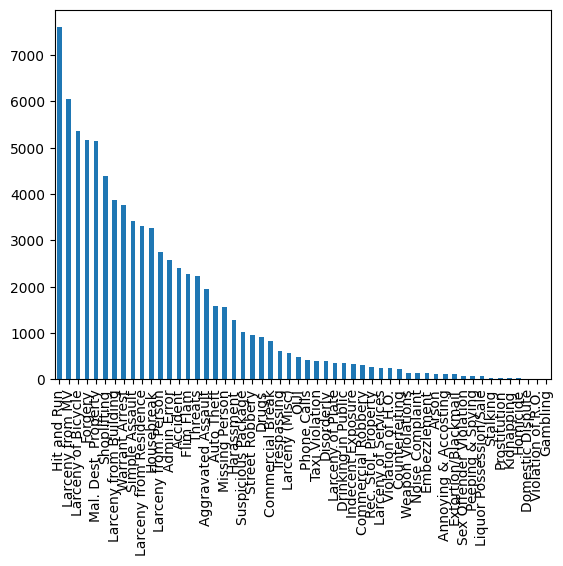

In [5]:
#print the number of crimes of each type
print(df['crime'].value_counts())

#plot the number of crimes of each type
df['crime'].value_counts().plot(kind='bar')

In [6]:
#print the types of neighborhoods
print(df['neighborhood'].unique())

#print the number of crimes of each neighborhood
print(df['neighborhood'].value_counts())

['Cambridgeport' 'North Cambridge' 'West Cambridge' 'Peabody'
 'East Cambridge' 'Highlands' 'Area 4' 'Inman/Harrington' 'Mid-Cambridge'
 'Riverside' nan 'Agassiz' 'MIT' 'Strawberry Hill']
Cambridgeport       11788
East Cambridge      10495
Mid-Cambridge        8292
North Cambridge      8231
Riverside            8079
West Cambridge       7964
Area 4               7907
Peabody              5040
Inman/Harrington     4891
Highlands            2141
Agassiz              2137
MIT                  1706
Strawberry Hill      1322
Name: neighborhood, dtype: int64


<Axes: ylabel='neighborhood'>

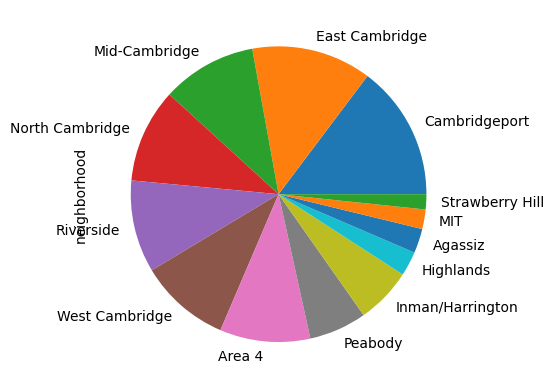

In [7]:
#create a pie chart of the number of crimes of each neighborhood
df['neighborhood'].value_counts().plot(kind='pie')


In [35]:
#count the number of crimes at each location
print(df['location'].value_counts())

100 CAMBRIDGESIDE PL, Cambridge, MA        2743
600 MASSACHUSETTS AVE, Cambridge, MA       2156
200 Alewife Brook Pky, Cambridge, MA       1123
500 MASSACHUSETTS AVE, Cambridge, MA        904
800 MASSACHUSETTS AVE, Cambridge, MA        759
                                           ... 
Third St & Charles St, Cambridge, MA          1
Chilton St & Huron Ave, Cambridge, MA         1
Cadbury Rd & Sherman St, Cambridge, MA        1
Unknown & Unknown, Cambridge, MA              1
BELMONT ST & SULLIVAN RD, Cambridge, MA       1
Name: location, Length: 4670, dtype: int64


In [ ]:
'''
More ideas:
- See what time of day most crimes occur
- See what day of the week most crimes occur
- See what month of the year most crimes occur
- See if the time of day differs per neighborhood
- See if the day of the week differs per neighborhood
- See if the month of the year differs per neighborhood
- See if the time of day differs per crime type
- See if the day of the week differs per crime type
- See if the month of the year differs per crime type
- Show on a map where those crimes happened that have multiple reports at the same location
'''

In [36]:
#count crime types per neighborhood
print(df.groupby('neighborhood')['crime'].value_counts())

neighborhood    crime                
Agassiz         Hit and Run              290
                Larceny from MV          246
                Larceny from Building    183
                Forgery                  153
                Larceny of Bicycle       151
                                        ... 
West Cambridge  Weapon Violations          3
                Homicide                   2
                Prostitution               1
                Stalking                   1
                Violation of R.O.          1
Name: crime, Length: 645, dtype: int64


1    12481
4    12408
2    12339
0    12287
3    12176
5     9751
6     8558
Name: day_of_week, dtype: int64
neighborhood    day_of_week
Agassiz         0               358
                4               347
                2               339
                3               330
                1               312
                               ... 
West Cambridge  2              1246
                1              1190
                0              1172
                5               997
                6               847
Name: day_of_week, Length: 91, dtype: int64


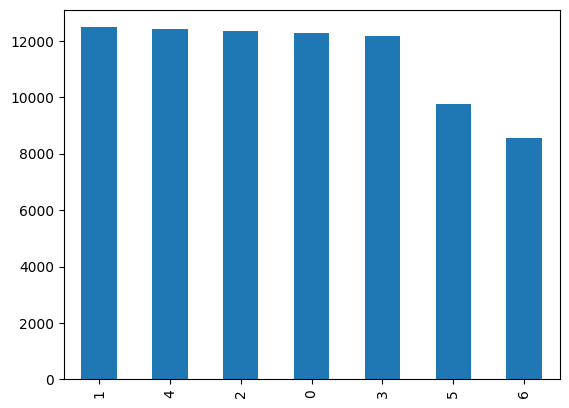

In [37]:
#save date of report as a day of the week
df['day_of_week'] = pd.to_datetime(df['date_of_report']).dt.dayofweek

#print the number of crimes of each day of the week
print(df['day_of_week'].value_counts())

#plot the number of crimes of each day of the week
df['day_of_week'].value_counts().plot(kind='bar')

# print the number of crimes of each day of the week per neighborhood
print(df.groupby('neighborhood')['day_of_week'].value_counts())

In [38]:
# print the number of crimes of each day of the week per crime type
print(df.groupby('crime')['day_of_week'].value_counts())

# print the number of crimes of each day of the week per neighborhood and crime type
print(df.groupby(['neighborhood', 'crime'])['day_of_week'].value_counts())

crime              day_of_week
Accident           4              430
                   1              413
                   2              391
                   3              384
                   0              332
                                 ... 
Weapon Violations  2               24
                   1               22
                   3               18
                   6               13
                   5                8
Name: day_of_week, Length: 367, dtype: int64
neighborhood    crime              day_of_week
Agassiz         Accident           4              14
                                   2              13
                                   3              13
                                   1              12
                                   0              10
                                                  ..
West Cambridge  Warrant Arrest     5              47
                                   4              39
                                   

8     7627
7     7530
10    7340
6     7283
9     7195
5     6879
11    6698
12    6224
3     6174
4     5957
1     5711
2     5382
Name: month, dtype: int64
neighborhood    month
Agassiz         9        223
                10       196
                6        195
                7        195
                11       186
                        ... 
West Cambridge  12       589
                3        585
                1        574
                4        569
                2        457
Name: month, Length: 156, dtype: int64


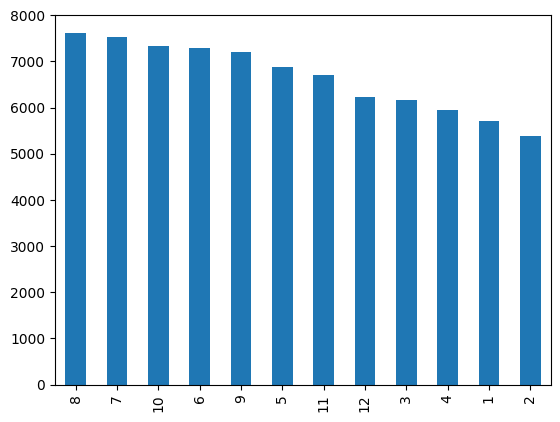

In [39]:
#save date of report by month
df['month'] = pd.to_datetime(df['date_of_report']).dt.month

#print the number of crimes of each month
print(df['month'].value_counts())

#plot the number of crimes of each month
df['month'].value_counts().plot(kind='bar')

# print the number of crimes of each month per neighborhood
print(df.groupby('neighborhood')['month'].value_counts())